In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("cmglonly/dataset-saham-bank-indonesia-2014-2024")

print("Path to dataset files:", path)

100%|██████████| 167k/167k [00:00<00:00, 45.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/cmglonly/dataset-saham-bank-indonesia-2014-2024/versions/5


In [ ]:
import pandas as pd
import os

# Assuming the path variable is still available from the previous cell execution
# If not, you would need to redefine or retrieve it.
# path = '/root/.cache/kagglehub/datasets/cmglonly/dataset-saham-bank-indonesia-2014-2024/versions/5'

# Construct the full path to the CSV file
csv_file_path = os.path.join(path, 'BBNI.JK_10_years.csv') # Modified to use the correct filename

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
display(df.head())

,Date,Adj Close,Close,High,Low,Open,Volume
0,2014-12-08 00:00:00+00:00,2277.288086,2987.5,3100.0,2962.5,3062.5,64048400
1,2014-12-09 00:00:00+00:00,2258.231201,2962.5,3000.0,2950.0,2962.5,43373200
2,2014-12-10 00:00:00+00:00,2296.344727,3012.5,3037.5,2962.5,2962.5,39428200
3,2014-12-11 00:00:00+00:00,2277.288086,2987.5,3012.5,2975.0,2987.5,52932200
4,2014-12-12 00:00:00+00:00,2286.816650,3000.0,3062.5,2975.0,3000.0,41642800


In [ ]:
import os

# Assuming the path variable is still available from the previous cell execution
# If not, you would need to redefine or retrieve it.
# path = '/root/.cache/kagglehub/datasets/cmglonly/dataset-saham-bank-indonesia-2014-2024/versions/5'

# List files in the directory
files_in_directory = os.listdir(path)

# Print the list of files
print("Files in the downloaded directory:")
for file in files_in_directory:
    print(file)

Files in the downloaded directory:
BBNI.JK_10_years.csv
BMRI.JK_10_years.csv
BBRI.JK_10_years.csv
BBCA.JK_10_years.csv


Bentuk Linear
## Penjelasan Matematis Masalah Optimasi Nonlinear dan Metode Penyelesaian

Berdasarkan data harga penutupan yang disesuaikan (`Adj Close`) dari saham BBNI, kita mendefinisikan masalah optimasi portofolio sederhana dengan tujuan **memaksimalkan rata-rata harga penutupan yang disesuaikan tertimbang**. Ini setara dengan **meminimalkan negatif dari rata-rata harga penutupan yang disesuaikan tertimbang**.

Misalkan kita memiliki $n$ periode waktu (jumlah baris dalam data). Kita ingin mencari bobot $\mathbf{w} = [w_1, w_2, \dots, w_n]$ untuk setiap periode waktu, di mana $w_i$ adalah bobot untuk harga penutupan yang disesuaikan pada periode $i$.

Harga penutupan yang disesuaikan pada periode $i$ adalah $p_i$.

**Fungsi Tujuan (untuk diminimalkan):**

Kita ingin meminimalkan negatif dari rata-rata tertimbang harga penutupan:
$$ \text{minimize} \quad f(\mathbf{w}) = -\sum_{i=1}^n w_i p_i $$

**Kendala:**

Kendala utama adalah bahwa jumlah total bobot harus sama dengan 1:
$$ \sum_{i=1}^n w_i = 1 $$

Selain itu, bobot harus non-negatif (karena ini adalah bobot portofolio):
$$ w_i \ge 0 \quad \text{untuk semua } i = 1, \dots, n $$

Jadi, masalah optimasi nonlinear kita adalah:
$$ \text{minimize} \quad f(\mathbf{w}) = -\mathbf{w}^T \mathbf{p} $$
$$ \text{subject to} \quad \mathbf{1}^T \mathbf{w} = 1 $$
$$ \quad \mathbf{w} \ge \mathbf{0} $$
di mana $\mathbf{p} = [p_1, p_2, \dots, p_n]^T$ adalah vektor harga penutupan yang disesuaikan, $\mathbf{1}$ adalah vektor kolom yang berisi angka 1, dan $\mathbf{0}$ adalah vektor kolom yang berisi angka 0.

Meskipun fungsi tujuan kita linear dalam bobot, kendala non-negatif membuat ini menjadi masalah optimasi constrained. Metode-metode yang Anda sebutkan dapat diterapkan pada masalah optimasi nonlinear secara umum, dan beberapa di antaranya sangat cocok untuk masalah dengan kendala.

### Metode Penyelesaian:

Berikut adalah penjelasan singkat tentang bagaimana metode-metode yang Anda sebutkan dapat diterapkan:

1.  **Metode Lagrange (Lagrangian Multipliers):**
    Metode ini digunakan untuk menyelesaikan masalah optimasi dengan kendala persamaan. Kita membentuk Fungsi Lagrangian dengan memperkenalkan pengali Lagrange ($\lambda$) untuk setiap kendala persamaan. Untuk masalah kita dengan kendala persamaan $\sum w_i - 1 = 0$, Lagrangiannya adalah:
    $$ \mathcal{L}(\mathbf{w}, \lambda) = f(\mathbf{w}) + \lambda (\sum_{i=1}^n w_i - 1) $$
    Untuk menangani kendala ketidaksetaraan ($w_i \ge 0$), kita menggunakan **Kondisi Karush-Kuhn-Tucker (KKT)**. Kondisi KKT adalah seperangkat kondisi yang diperlukan agar solusi menjadi optimal dalam masalah optimasi nonlinear dengan kendala. Kondisi KKT untuk masalah kita adalah:
    *   **Stationarity**: Gradien dari Lagrangian terhadap $\mathbf{w}$ harus nol:
        $$ \nabla_{\mathbf{w}} \mathcal{L}(\mathbf{w}, \lambda) = \nabla f(\mathbf{w}) + \lambda \nabla (\sum w_i - 1) - \boldsymbol{\mu} = -\mathbf{p} + \lambda \mathbf{1} - \boldsymbol{\mu} = \mathbf{0} $$
        di mana $\boldsymbol{\mu} = [\mu_1, \mu_2, \dots, \mu_n]^T$ adalah pengali Lagrange untuk kendala non-negatif ($w_i \ge 0$), dan $\mu_i \ge 0$.
    *   **Primal Feasibility**: Kendala harus dipenuhi:
        $$ \sum_{i=1}^n w_i = 1 $$
        $$ w_i \ge 0 \quad \text{untuk semua } i $$
    *   **Dual Feasibility**: Pengali Lagrange untuk kendala ketidaksetaraan harus non-negatif:
        $$ \mu_i \ge 0 \quad \text{untuk semua } i $$
    *   **Complementary Slackness**: Produk dari pengali Lagrange dan kendala yang sesuai harus nol:
        $$ \mu_i w_i = 0 \quad \text{untuk semua } i $$
    Menyelesaikan sistem persamaan dan ketidaksetaraan yang diberikan oleh kondisi KKT memungkinkan kita menemukan solusi optimal.

2.  **Metode Newton:**
    Metode Newton adalah metode iteratif untuk mencari akar dari suatu fungsi, atau dalam optimasi, mencari titik stasioner (di mana gradien fungsi tujuan adalah nol). Metode ini menggunakan informasi gradien (turunan pertama) dan Hessian (turunan kedua) dari fungsi tujuan. Untuk masalah optimasi tanpa kendala, langkah iterasi Newton diberikan oleh:
    $$ \mathbf{w}_{k+1} = \mathbf{w}_k - H(\mathbf{w}_k)^{-1} \nabla f(\mathbf{w}_k) $$
    di mana $\nabla f$ adalah gradien dan $H$ adalah matriks Hessian. Untuk masalah dengan kendala, versi yang dimodifikasi dari Metode Newton (seperti **Sequential Quadratic Programming - SQP**) sering digunakan. SQP menyelesaikan masalah optimasi nonlinear dengan menyelesaikan serangkaian subproblem kuadratik. Setiap subproblem kuadratik adalah aproksimasi dari masalah optimasi asli di sekitar iterasi saat ini, dengan kendala yang dilinearisasi. Metode Newton digunakan untuk menyelesaikan subproblem kuadratik ini.

3.  **Metode Quasi-Newton:**
    Metode Quasi-Newton mirip dengan Metode Newton tetapi menghindari perhitungan matriks Hessian yang mahal. Sebagai gantinya, mereka mengaproksimasi invers dari Hessian (atau Hessian itu sendiri) menggunakan informasi gradien dari iterasi sebelumnya. Contoh metode Quasi-Newton yang populer termasuk **BFGS (Broyden–Fletcher–Goldfarb–Shanno)** dan **L-BFGS (Limited-memory BFGS)**. Metode ini juga sering digunakan dalam kerangka kerja untuk menangani kendala. Mereka memperbarui aproksimasi Hessian pada setiap iterasi berdasarkan perubahan gradien dan variabel.

4.  **Metode Conjugate Gradient:**
    Metode Conjugate Gradient adalah metode iteratif yang efisien untuk menyelesaikan sistem persamaan linear dan sering digunakan untuk meminimalkan fungsi kuadratik. Untuk masalah optimasi nonlinear umum, metode ini dapat digunakan dengan melakukan serangkaian minimisasi garis dalam arah konjugat. Arah konjugat adalah arah pencarian yang ortogonal sehubungan dengan matriks Hessian. Metode ini sangat efektif untuk masalah skala besar tanpa kendala atau dengan kendala sederhana. Untuk masalah dengan kendala, metode ini dapat digunakan dalam pendekatan seperti augmented Lagrangian atau metode proyeksi gradien.

5.  **Metode Interior Point:**
    Metode Interior Point adalah kelas algoritma yang dirancang untuk menyelesaikan masalah optimasi dengan kendala, termasuk kendala ketidaksetaraan. Metode ini bekerja dengan tetap berada di dalam daerah yang layak (interior) dan mendekati solusi optimal pada batas daerah layak. Mereka sering menggunakan **barrier function** (fungsi penghalang) untuk mengubah masalah constrained menjadi serangkaian masalah unconstrained yang dapat diselesaikan dengan metode seperti Newton. Fungsi penghalang menambahkan "penalti" ke fungsi tujuan yang menjadi sangat besar saat mendekati batas kendala, sehingga mendorong iterasi untuk tetap berada di dalam interior. Metode Interior Point sangat efektif untuk masalah optimasi skala besar, termasuk program linear dan program kuadratik.

Untuk masalah optimasi portofolio sederhana yang kita definisikan, metode-metode yang menangani kendala (seperti Metode Lagrange dengan KKT, Metode Newton dalam kerangka SQP, atau Metode Interior Point) akan lebih sesuai. Metode Newton, Quasi-Newton, dan Conjugate Gradient dapat digunakan untuk subproblem tanpa kendala yang muncul dalam metode constrained atau untuk masalah optimasi yang dimodifikasi.

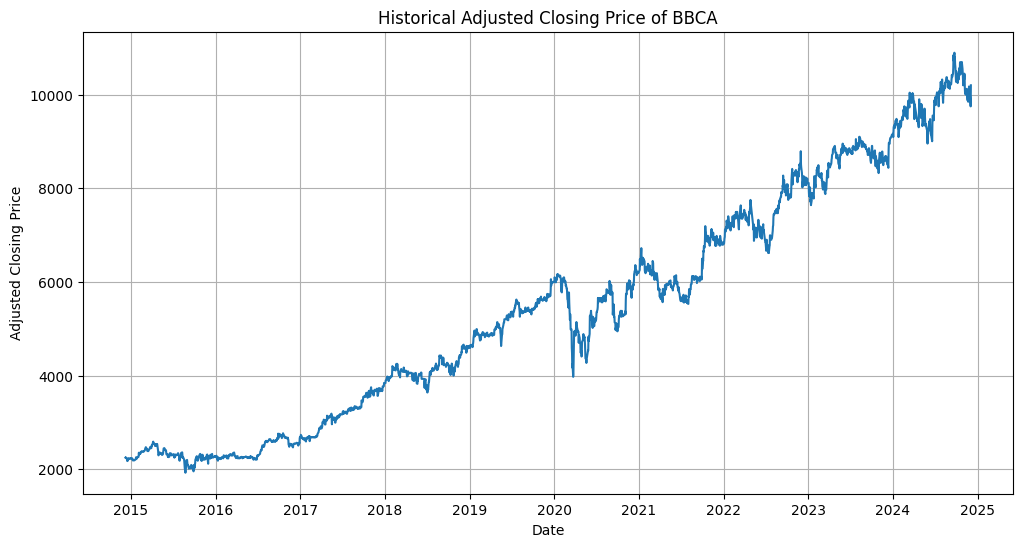

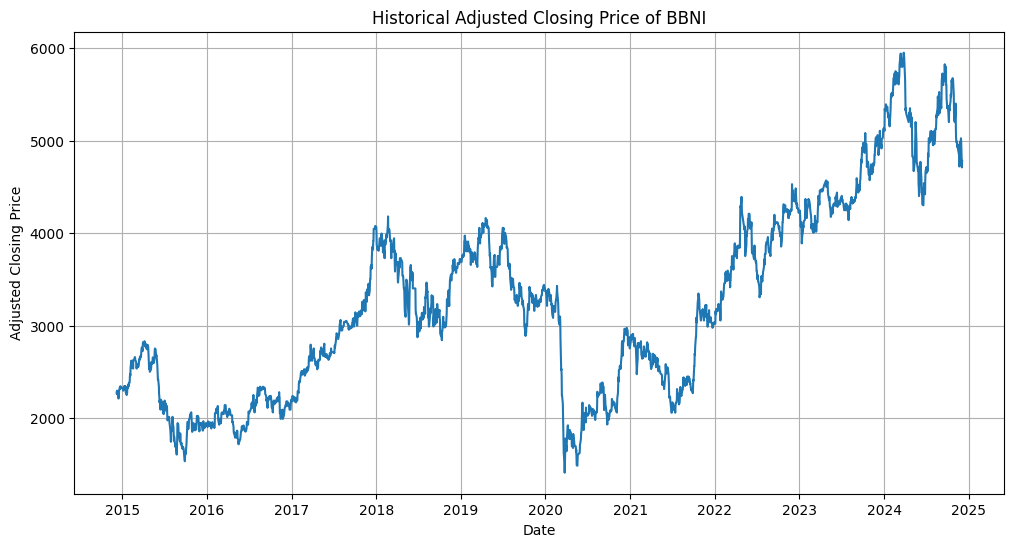

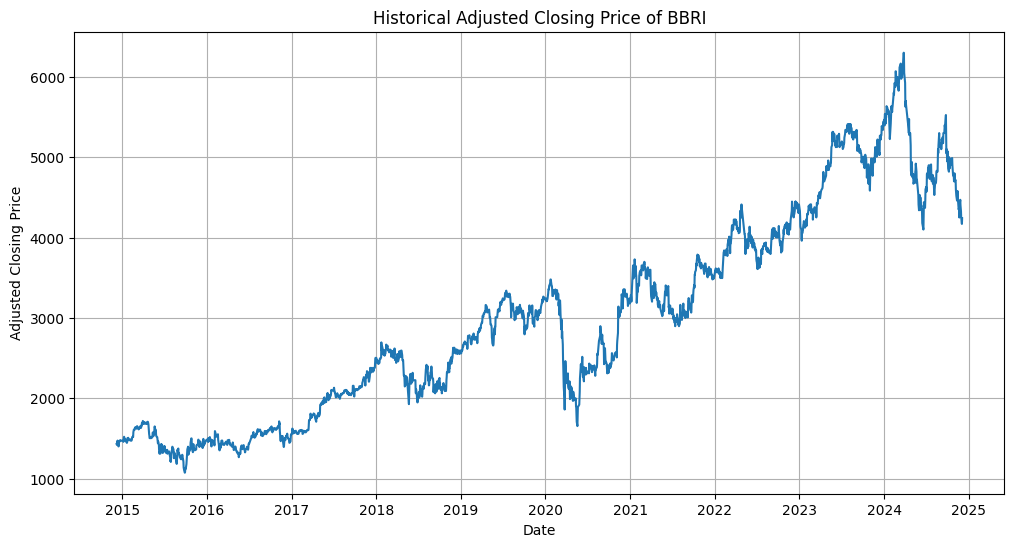

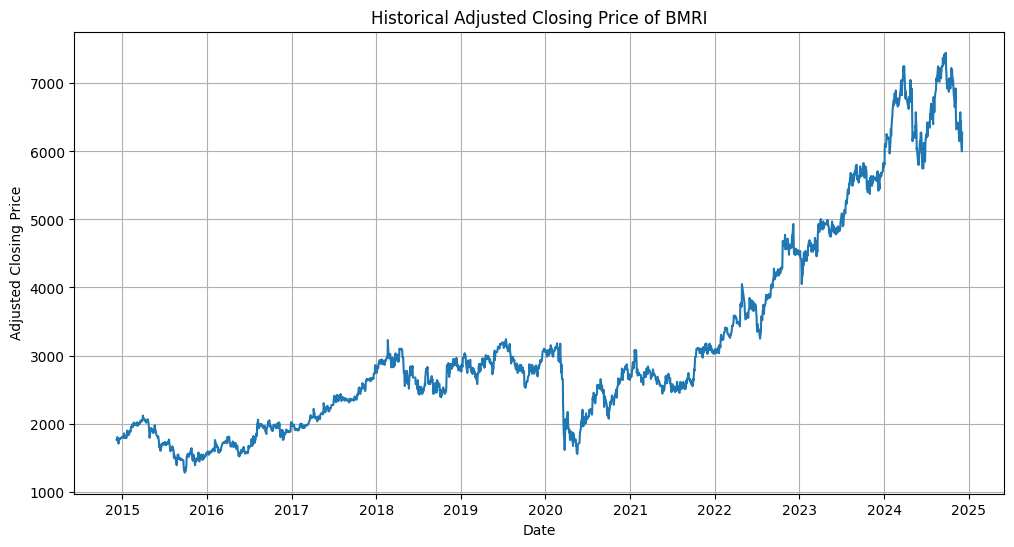

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Assuming the path variable is still available from the previous cell execution
# If not, you would need to redefine or retrieve it.
# path = '/root/.cache/kagglehub/datasets/cmglonly/dataset-saham-bank-indonesia-2014-2024/versions/5'

# List of the stock data files
stock_files = ['BBCA.JK_10_years.csv', 'BBNI.JK_10_years.csv', 'BBRI.JK_10_years.csv', 'BMRI.JK_10_years.csv']

# Iterate through each file and create a plot
for file in stock_files:
    csv_file_path = os.path.join(path, file)
    try:
        # Read the CSV file into a pandas DataFrame
        df_stock = pd.read_csv(csv_file_path)

        # Ensure the 'Date' column is in datetime format
        df_stock['Date'] = pd.to_datetime(df_stock['Date'])

        # Plot the 'Adj Close' prices over time
        plt.figure(figsize=(12, 6))
        plt.plot(df_stock['Date'], df_stock['Adj Close'])
        plt.title(f'Historical Adjusted Closing Price of {file.split(".")[0]}')
        plt.xlabel('Date')
        plt.ylabel('Adjusted Closing Price')
        plt.grid(True)
        plt.show()

    except FileNotFoundError:
        print(f"File not found: {file}")
    except KeyError:
        print(f"Could not find 'Adj Close' or 'Date' column in {file}")
    except Exception as e:
        print(f"An error occurred while processing {file}: {e}")

Baik, mari kita jelaskan secara lebih detail lagi hubungan antara data saham yang kita miliki dan konsep matematika yang dapat diterapkan. Data saham ini kaya akan informasi yang bisa dianalisis menggunakan berbagai alat matematis.

Kita memiliki kolom-kolom data seperti 'Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', dan 'Volume'. Berikut adalah bagaimana setiap kolom atau kombinasinya berhubungan dengan matematika:

1.  **'Date'**: Kolom ini merepresentasikan waktu, yang merupakan elemen krusial dalam analisis deret waktu (time series analysis). Matematika di sini melibatkan konsep waktu diskrit, interval waktu, dan pengurutan. Perubahan harga saham dianalisis berdasarkan waktu.

2.  **'Adj Close', 'Close', 'High', 'Low', 'Open'**: Kolom-kolom harga ini adalah nilai numerik yang merupakan subjek utama analisis kuantitatif.
    *   **Statistik Deskriptif**: Kita bisa menghitung rata-rata (mean), median, modus, standar deviasi (untuk mengukur volatilitas), varians, skewness, dan kurtosis dari data harga untuk memahami distribusi dan karakteristiknya.
    *   **Perubahan Harga (Returns)**: Kita sering kali lebih tertarik pada persentase perubahan harga (return) daripada harga absolut. Return harian, mingguan, atau bulanan dihitung menggunakan rumus matematis:
        $$ \text{Return}_t = \frac{P_t - P_{t-1}}{P_{t-1}} \quad \text{atau} \quad \text{Log Return}_t = \ln\left(\frac{P_t}{P_{t-1}}\right) $$
        di mana $P_t$ adalah harga pada waktu $t$. Analisis return ini melibatkan konsep deret waktu stokastik.
    *   **Analisis Deret Waktu**: Data harga saham adalah contoh klasik dari deret waktu. Model matematika seperti ARIMA (AutoRegressive Integrated Moving Average), GARCH (Generalized Autoregressive Conditional Heteroskedasticity) digunakan untuk memodelkan dan memprediksi volatilitas deret waktu ini. Ini melibatkan konsep persamaan diferensial, regresi, dan analisis stasioneritas.
    *   **Optimasi**: Seperti yang sudah kita bahas, data harga ini digunakan dalam masalah optimasi portofolio. Fungsi tujuan (misalnya, memaksimalkan return) dan kendala (misalnya, alokasi dana) diformulasikan secara matematis dan diselesaikan menggunakan metode optimasi nonlinear yang sudah disebutkan (Lagrange, Newton, dll.).
    *   **Analisis Teknikal**: Banyak indikator analisis teknikal didasarkan pada perhitungan matematis dari data harga, seperti Moving Averages (rata-rata bergerak), RSI (Relative Strength Index), MACD (Moving Average Convergence Divergence). Ini melibatkan perhitungan rata-rata, eksponensial, dan perbandingan.

3.  **'Volume'**: Kolom ini menunjukkan jumlah saham yang diperdagangkan.
    *   **Analisis Statistik**: Statistik deskriptif juga berlaku untuk volume.
    *   **Hubungan dengan Harga**: Analisis matematis dapat dilakukan untuk melihat korelasi atau hubungan lain antara volume dan pergerakan harga menggunakan regresi atau analisis korelasi. Volume sering digunakan sebagai indikator kekuatan tren harga.

4.  **Hubungan Antar Saham (Multiple Files)**: Ketika mempertimbangkan data dari beberapa saham (BBCA, BBNI, BBRI, BMRI), hubungan matematis menjadi lebih kompleks.
    *   **Korelasi dan Kovarians**: Mengukur sejauh mana pergerakan harga satu saham terkait dengan saham lainnya. Matriks kovarians atau korelasi antar return saham sangat penting dalam optimasi portofolio modern (misalnya, model Markowitz). Ini melibatkan aljabar linear dan statistik multivariat.
    *   **Model Portofolio**: Membangun portofolio optimal dari beberapa saham melibatkan matematika optimasi nonlinear, di mana kita mencari bobot yang meminimalkan risiko (misalnya, varians portofolio) untuk tingkat return yang diinginkan, dengan mempertimbangkan kovarians antar saham.
    *   **Analisis Faktor**: Model seperti CAPM (Capital Asset Pricing Model) atau model multi-faktor menggunakan regresi untuk menjelaskan return saham berdasarkan faktor-faktor pasar.

Secara keseluruhan, setiap aspek data saham ini dapat dianalisis dan dimodelkan menggunakan berbagai cabang matematika, mulai dari statistik dasar, kalkulus (untuk optimasi dan gradien), aljabar linear (untuk operasi vektor/matriks dan hubungan antar saham), hingga matematika stokastik (untuk pemodelan deret waktu).

In [ ]:
import numpy as np
from scipy.optimize import minimize

# Select the 'Adj Close' prices from BBNI data for this example
# (Assuming df is already loaded with BBNI data)
adj_close_prices = df['Adj Close'].values # Use .values to get a numpy array

# Define the objective function (to minimize) - Negative of weighted average price
def objective_function(weights, prices):
    return -np.dot(weights, prices)

# Define the equality constraint (sum of weights equals 1)
def eq_constraint(weights):
    return np.sum(weights) - 1.0

# Define the bounds for the weights (weights should be non-negative)
# The upper bound can be 1 since sum of weights is 1
bounds = [(0.0, 1.0) for _ in range(len(adj_close_prices))]

# Define the constraints for scipy.optimize.minimize
constraints = [{'type': 'eq', 'fun': eq_constraint}]

# Define the initial guess for the weights (equal weights)
initial_weights = np.array([1.0/len(adj_close_prices)] * len(adj_close_prices))

# Perform the optimization using a method that handles constraints (e.g., 'SLSQP')
# SLSQP (Sequential Least Squares Programming) is suitable for this type of problem
result = minimize(objective_function, initial_weights, args=(adj_close_prices,),
                  method='SLSQP', bounds=bounds, constraints=constraints)

# Display the results
print("Optimization Results:")
print("Success:", result.success)
print("Message:", result.message)
print("Optimal weights:", result.x)
print("Optimal objective function value (Negative of Weighted Average Price):", result.fun)
print("Maximized Weighted Average Price:", -result.fun)

# Verify constraints are met (sum of weights is close to 1)
print("Sum of optimal weights:", np.sum(result.x))

# Verify non-negativity (should be handled by bounds)
print("Minimum weight:", np.min(result.x))

KeyboardInterrupt: 